In [5]:
import pandas as pd
import matplotlib.pyplot as plt

#### 2(a)

Below is the Q-table for the first 10 iterations for all three agents. The files have been modified to allow a custom save tag and modify the gambler's parameters while calling train.py

In [6]:
!python train.py --agent=ACCOUNTANT --iterations=10 --save_tag=_2a
!python train.py --agent=GAMBLER --iterations=10 --save_tag=_2a
!python train.py --agent=DRUNKARD --iterations=10 --save_tag=_2a

{"step": 0, "performance": 0.0, "total_reward": 0}


Final Q-table
    0  1  2  3  4
0  0  4  0  0  0
1  0  0  4  0  0
{"step": 0, "performance": 0.0, "total_reward": 0}


Final Q-table
         0    1        2       3  4
0  0.6125  0.0  0.00000  0.0000  0
1  0.0000  0.5  1.36015  1.2401  0
{"step": 0, "performance": 0.0, "total_reward": 0}


Final Q-table
 Empty DataFrame
Columns: []
Index: []


#### 2(b)

Below is the modified Gambler code, which modulates the exploration rate from the initial to the later conditions, as is printed. The rate at which values are saved and printed is modified to every step to allow for graphing of the reward after 10 iterations (otherwise there would only be 1 data point)

In [7]:
# alpha = 0.4 = learning rate
# gamma = 0.8 = discount
# epsilon = .. = explore

!python train.py --agent=GAMBLER_HW --iterations=10 --learning_rate=0.4 --discount=0.8 --exploration_rate=0.5 --save_tag=_2b --step_max=1

1
{"step": 0, "performance": 0.0, "total_reward": 0}
2
{"step": 1, "performance": 0.008, "total_reward": 2}
3
{"step": 2, "performance": 0.0, "total_reward": 2}
4
{"step": 3, "performance": 0.0, "total_reward": 2}
5
Switch exploration rate at iter 5 to rate 0.5
{"step": 4, "performance": 0.008, "total_reward": 4}
6
{"step": 5, "performance": 0.0, "total_reward": 4}
7
{"step": 6, "performance": 0.008, "total_reward": 6}
8
{"step": 7, "performance": 0.0, "total_reward": 6}
9
{"step": 8, "performance": 0.008, "total_reward": 8}
10
{"step": 9, "performance": 0.008, "total_reward": 10}


Final Q-table
           0         1        2  3  4
0  1.318822  0.000000  0.00000  0  0
1  0.000000  1.692242  0.88192  0  0


In [8]:
!python train.py --agent=ACCOUNTANT --iterations=10 --save_tag=_2b --step_max=1

{"step": 0, "performance": 0.0, "total_reward": 0}
{"step": 1, "performance": 0.0, "total_reward": 0}
{"step": 2, "performance": 0.008, "total_reward": 2}
{"step": 3, "performance": 0.0, "total_reward": 2}
{"step": 4, "performance": 0.008, "total_reward": 4}
{"step": 5, "performance": 0.0, "total_reward": 4}
{"step": 6, "performance": 0.008, "total_reward": 6}
{"step": 7, "performance": 0.0, "total_reward": 6}
{"step": 8, "performance": 0.0, "total_reward": 6}
{"step": 9, "performance": 0.008, "total_reward": 8}


Final Q-table
    0  1  2  3  4
0  0  4  0  0  0
1  0  0  4  0  0


In [9]:
!python train.py --agent=DRUNKARD --iterations=10 --save_tag=_2b --step_max=1

{"step": 0, "performance": 0.0, "total_reward": 0}
{"step": 1, "performance": 0.0, "total_reward": 0}
{"step": 2, "performance": 0.008, "total_reward": 2}
{"step": 3, "performance": 0.0, "total_reward": 2}
{"step": 4, "performance": 0.008, "total_reward": 4}
{"step": 5, "performance": 0.0, "total_reward": 4}
{"step": 6, "performance": 0.0, "total_reward": 4}
{"step": 7, "performance": 0.008, "total_reward": 6}
{"step": 8, "performance": 0.0, "total_reward": 6}
{"step": 9, "performance": 0.0, "total_reward": 6}


Final Q-table
 Empty DataFrame
Columns: []
Index: []


In [10]:
gambler = pd.read_csv('simple_RL_GAMBLER_HW_2b.csv')
accountant = pd.read_csv('simple_RL_ACCOUNTANT_2b.csv')
drunkard = pd.read_csv('simple_RL_DRUNKARD_2b.csv')

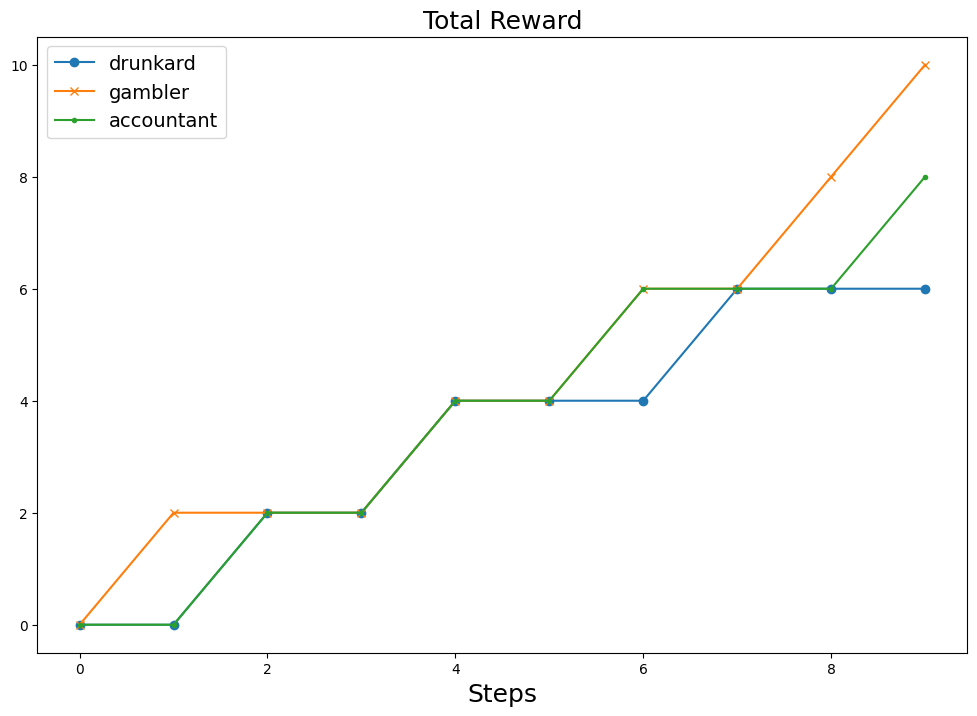

In [11]:

plt.figure(figsize=(12,8))
plt.plot(drunkard['Step'], drunkard['Total Reward'], label='drunkard', marker='o')
plt.plot(gambler['Step'], gambler['Total Reward'], label='gambler',marker='x')
plt.plot(accountant['Step'], accountant['Total Reward'], label='accountant',marker='.')
plt.xlabel('Steps', fontsize=18)
plt.title('Total Reward', fontsize=18)
plt.legend(prop={'size': 14})
plt.show()

#### 3(a)

Below is the code for 3(a) to generate figures for the average reward, and % optimal action. There are three agents with three different action value methods: sample averages (sample_average), incrementally computed (incremental), and constant step size (constant_step) with an alpha value of 0.1. All agents have epsilon = 0.1, and are trained across 10,000 steps with 200 iterations at each step to obtain an average for each data point.

We first create the TestBed class to handle intializing the action values, stepping the values through random walk, and resetting the reward after each test

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time

class TestBed(object):
    def __init__(self, k, mean=0, sigma=0.1, seed=0):
        self.k = k # Number of arms
        self.mean = mean        
        self.sigma = sigma      

        self.actArr = np.zeros(k)   # Action values
        self.optim = 0                  # Store optimal value for greedy
        self.reset()

        self.seed = seed
        np.random.seed(self.seed)

    # Reset TestBed for next iteration
    def reset(self):
        # Identify the maximum value in action array
        self.optim = np.argmax(self.actArr)

        self.actArr = np.zeros(self.k)

    def step_reward(self):
        np.random.seed(self.seed)

        # Random walk each action value
        self.actArr = self.actArr + np.random.normal(self.mean, self.sigma, self.k)
        self.seed += 12

        self.optim = np.argmax(self.actArr)

We then create the agent class who will use a given action value method to estimate the value of taking certain actions.

Each of the action value methods are specified in a seperate function. When the reward is calculated, we update our action value estimation by giving the returned reward as an input to the specific method defined by that agent. Each function has a note 
with the given action value function that is utilized

In [13]:
class Agent(object):
    def __init__(self, k, action_value="sample_average", epsilon=0, alpha=0.1):
        self.k = k                              # Number of arms
        self.epsilon = epsilon                  # Epsilon probability of taking a random action
        self.alpha = alpha                      # Step size parameter

        self.time_step = 0                      # Time step t
        self.last_action = None                 # Store last action

        self.n_action = np.zeros(k)             # Count of actions taken at time t
        self.r_sum = np.zeros(k)                # Sum number of rewards for each action
        self.val_estimates = np.zeros(k)        # Action value estimates
        self.action_value = action_value        # Action value method
        

    def __str__(self):
        return self.action_value

    # Epsilon-greedy action scheme
    # If greedy, take max action-value estimate
    # If not, take random action
    def action(self):
        # Not greedy
        randProb = np.random.random()   # Pick random probability between 0-1
        if randProb < self.epsilon:
            a = np.random.choice(len(self.val_estimates))    # Select random action

        # Greedy
        else:
            max_action = np.argmax(self.val_estimates)
            action = np.where(self.val_estimates == np.argmax(self.val_estimates))[0]

            if len(action) == 0:
                a = max_action
            else:
                a = np.random.choice(action)

        # save the last action
        self.last_action = a
        return a

    ##########################################
    # Action value methods

    # Sample average
    def AV_sample_average(self, reward):
        # Calculate the new action-value using:
        # Q_n+1 = r_sum/n_action

        At = self.last_action

        self.n_action[At] += 1       # Add 1 to action selection
        self.r_sum[At] += reward     # Add reward to sum array
        self.time_step += 1          # Increase time step

        # Calculate new action-value
        self.val_estimates[At] = self.r_sum[At]/self.n_action[At]

    # Incrementally computed
    def AV_increment(self, reward):
        # Calculate the new action value using:
        # Q_n+1 = Q_n + (reward - Q_n)/n_action
        
        At = self.last_action
        
        self.n_action[At] += 1       # Add 1 to action selection
        self.time_step += 1          # Increase time step

        self.val_estimates[At] = self.val_estimates[At] + (reward - self.val_estimates[At])/self.n_action[At]


    # constant step
    def AV_constant_step(self, reward):
        # Calculate the new action value using:
        # Q_n+1 = Q_n + alpha(reward - Q_n)        
        At = self.last_action
        
        self.n_action[At] += 1       # Add 1 to action selection
        self.time_step += 1          # Increase time step

        self.val_estimates[At] = self.val_estimates[At] + self.alpha*(reward - self.val_estimates[At])

    ##########################################

    # Reset all variables for next iteration
    def reset(self):
        self.time_step = 0                    
        self.last_action = None               

        self.n_action[:] = 0                  
        self.r_sum[:] = 0
        self.val_estimates[:] = 0  

Lastly we creat the enviornment class which runs the simulation with the given test bed, agents, steps (how many steps do we take for each agent) and iterations (how many times do we test each step to obtain an average response)

In [14]:
class Environment(object):
    def __init__(self, TestBed, agents, steps, iterations):
        self.TestBed = TestBed
        self.agents = agents
        self.steps = steps
        self.iterations = iterations

    def play(self):
        scoreArr = np.zeros((self.steps, len(self.agents)))     # Store score of each agent
        optimlArr = np.zeros((self.steps, len(self.agents)))    # Store optimal count of each agent

        # Loop for iterations to obtain average response
        for iter in range(self.iterations):
            if (iter%10) == 0:
                print("Completed Iterations: ",iter)

            # Reset testbed and all agents before starting iteration
            self.TestBed.reset()
            for agent in self.agents:
                agent.reset()

            # Loop for number of steps
            for jsteps in range(self.steps):
                agent_count = 0
                self.TestBed.step_reward()

                for kAgent in self.agents:
                    actionT =  kAgent.action() # Complete an action
                    rewardT = self.TestBed.actArr[actionT] # Get the reward from the action

                    # Agent updates the action value evaluation
                    if kAgent.action_value == "sample_average": 
                        kAgent.AV_sample_average(reward=rewardT)
                    elif kAgent.action_value == "increment":
                        kAgent.AV_increment(reward=rewardT)
                    elif kAgent.action_value == "constant_step":
                        kAgent.AV_constant_step(reward=rewardT)
                    else:
                        print("Error! Wrong action value function selected")
                        break

                    scoreArr[jsteps,agent_count] += rewardT # Add the total reward

                    # Check if action was optimal
                    if actionT == self.TestBed.optim:
                        optimlArr[jsteps,agent_count] += 1


                    agent_count += 1

        # Caculate the average response for all iterations
        scoreAvg = scoreArr/self.iterations
        optimlAvg = optimlArr/self.iterations

        return scoreAvg, optimlAvg


We then run the simulation with a given seed (234) to generate the figures

Running...
Completed Iterations:  0
Completed Iterations:  10
Completed Iterations:  20
Completed Iterations:  30
Completed Iterations:  40
Completed Iterations:  50
Completed Iterations:  60
Completed Iterations:  70
Completed Iterations:  80
Completed Iterations:  90
Completed Iterations:  100
Completed Iterations:  110
Completed Iterations:  120
Completed Iterations:  130
Completed Iterations:  140
Completed Iterations:  150
Completed Iterations:  160
Completed Iterations:  170
Completed Iterations:  180
Completed Iterations:  190
Execution time: 50.97235345840454 seconds


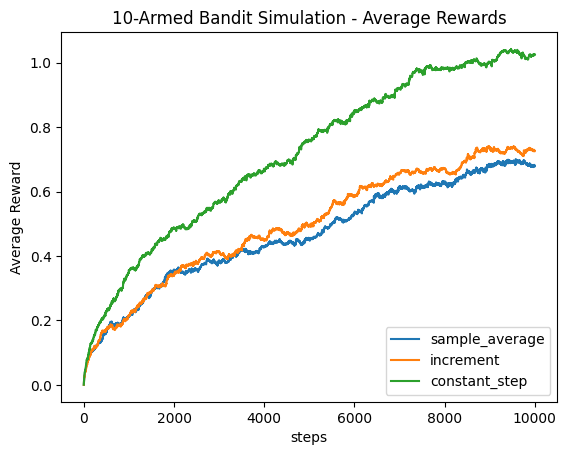

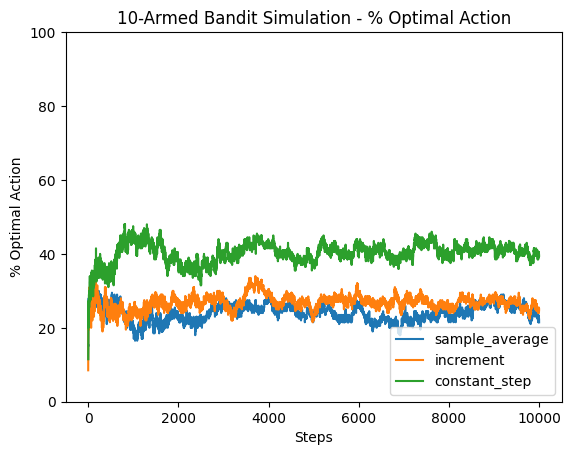

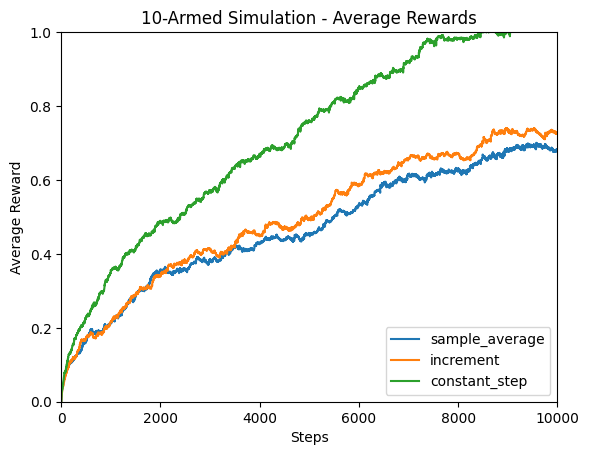

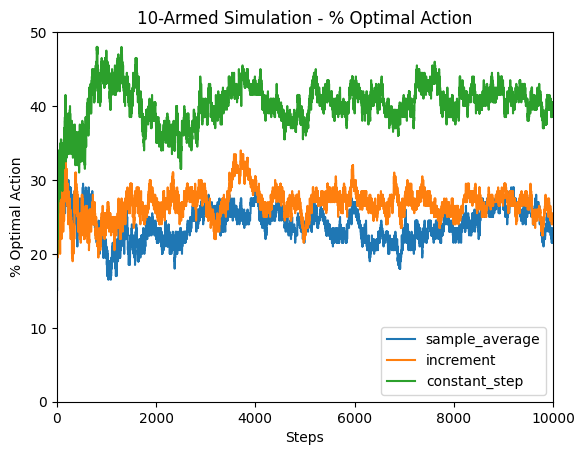

In [16]:
start_time = time.time()        # Start timer
k = 10                          # k-armed bandit
iterations = 200                # number of repeated iterations
steps = 10000                   # number of steps per iteration

# Set up intial objects
TestBed = TestBed(k=k,mean=0,sigma=0.01, seed=234)
agents = [Agent(k=k),Agent(k=k, action_value="increment"),Agent(k=k, action_value="constant_step")]
environment = Environment(TestBed=TestBed,agents=agents,steps=steps,iterations=iterations)

#234

# Run Environment
print("Running...")
avg_scores, avg_optimal = environment.play()
print("Execution time: %s seconds" % (time.time() - start_time))


#Graph 1 - Averate rewards over all steps
plt.title("10-Armed Bandit Simulation - Average Rewards")
plt.plot(avg_scores)
plt.ylabel('Average Reward')
plt.xlabel('steps')
plt.legend(agents, loc=4)
plt.show()

#Graph 1 - optimal selections over all steps
plt.title("10-Armed Bandit Simulation - % Optimal Action")
plt.plot(avg_optimal * 100)
plt.ylim(0, 100)
plt.ylabel('% Optimal Action')
plt.xlabel('Steps')
plt.legend(agents, loc=4)
plt.show()

plt.title("10-Armed Simulation - Average Rewards")
plt.plot(avg_scores)
plt.ylabel('Average Reward')
plt.xlabel('Steps')
plt.ylim(0, 1)
plt.xlim(0, 10000)
plt.legend(agents, loc=4)
plt.show()

#Graph 1 - optimal selections over all steps
plt.title("10-Armed Simulation - % Optimal Action")
plt.plot(avg_optimal * 100)
plt.ylim(0, 50)
plt.xlim(0, 10000)
plt.ylabel('% Optimal Action')
plt.xlabel('Steps')
plt.legend(agents, loc=4)
plt.show()